# <center> CS559: Homework #2 </center>
###  <center> Due:10/8/2021 Friday 11:59 PM</center>

- Change the file name as YourName_F21_CS559_HW2
- Submit the assignment in `ipynb` and `html` formats. 
    - You can export the notebook in HTML. 
    - Do not compress your files. Please submit files individually. 
- All work must be your own and must not be shared with other classmates. 
    - Collaboration with classmates or getting help by any people is not acceptable. 
    - For impletementation problems, do not copy algorithms from internet. 

### Problem 1 - Linear Regression [35 pts]

1-a. Consider a data set in which each data point $t_n$ is associated with a weighting factor $r_n>0$, so that the sum of squares error function becomes 

$${\large E_D(\vec{w})=\frac{1}{2}\sum_{n=1}^Nr_n\big(t_n-\vec{w}^T\vec{x}_n\big)^2}$$

Find an expression for the solution $w^*$ that minimizes this error function. [5 pts]

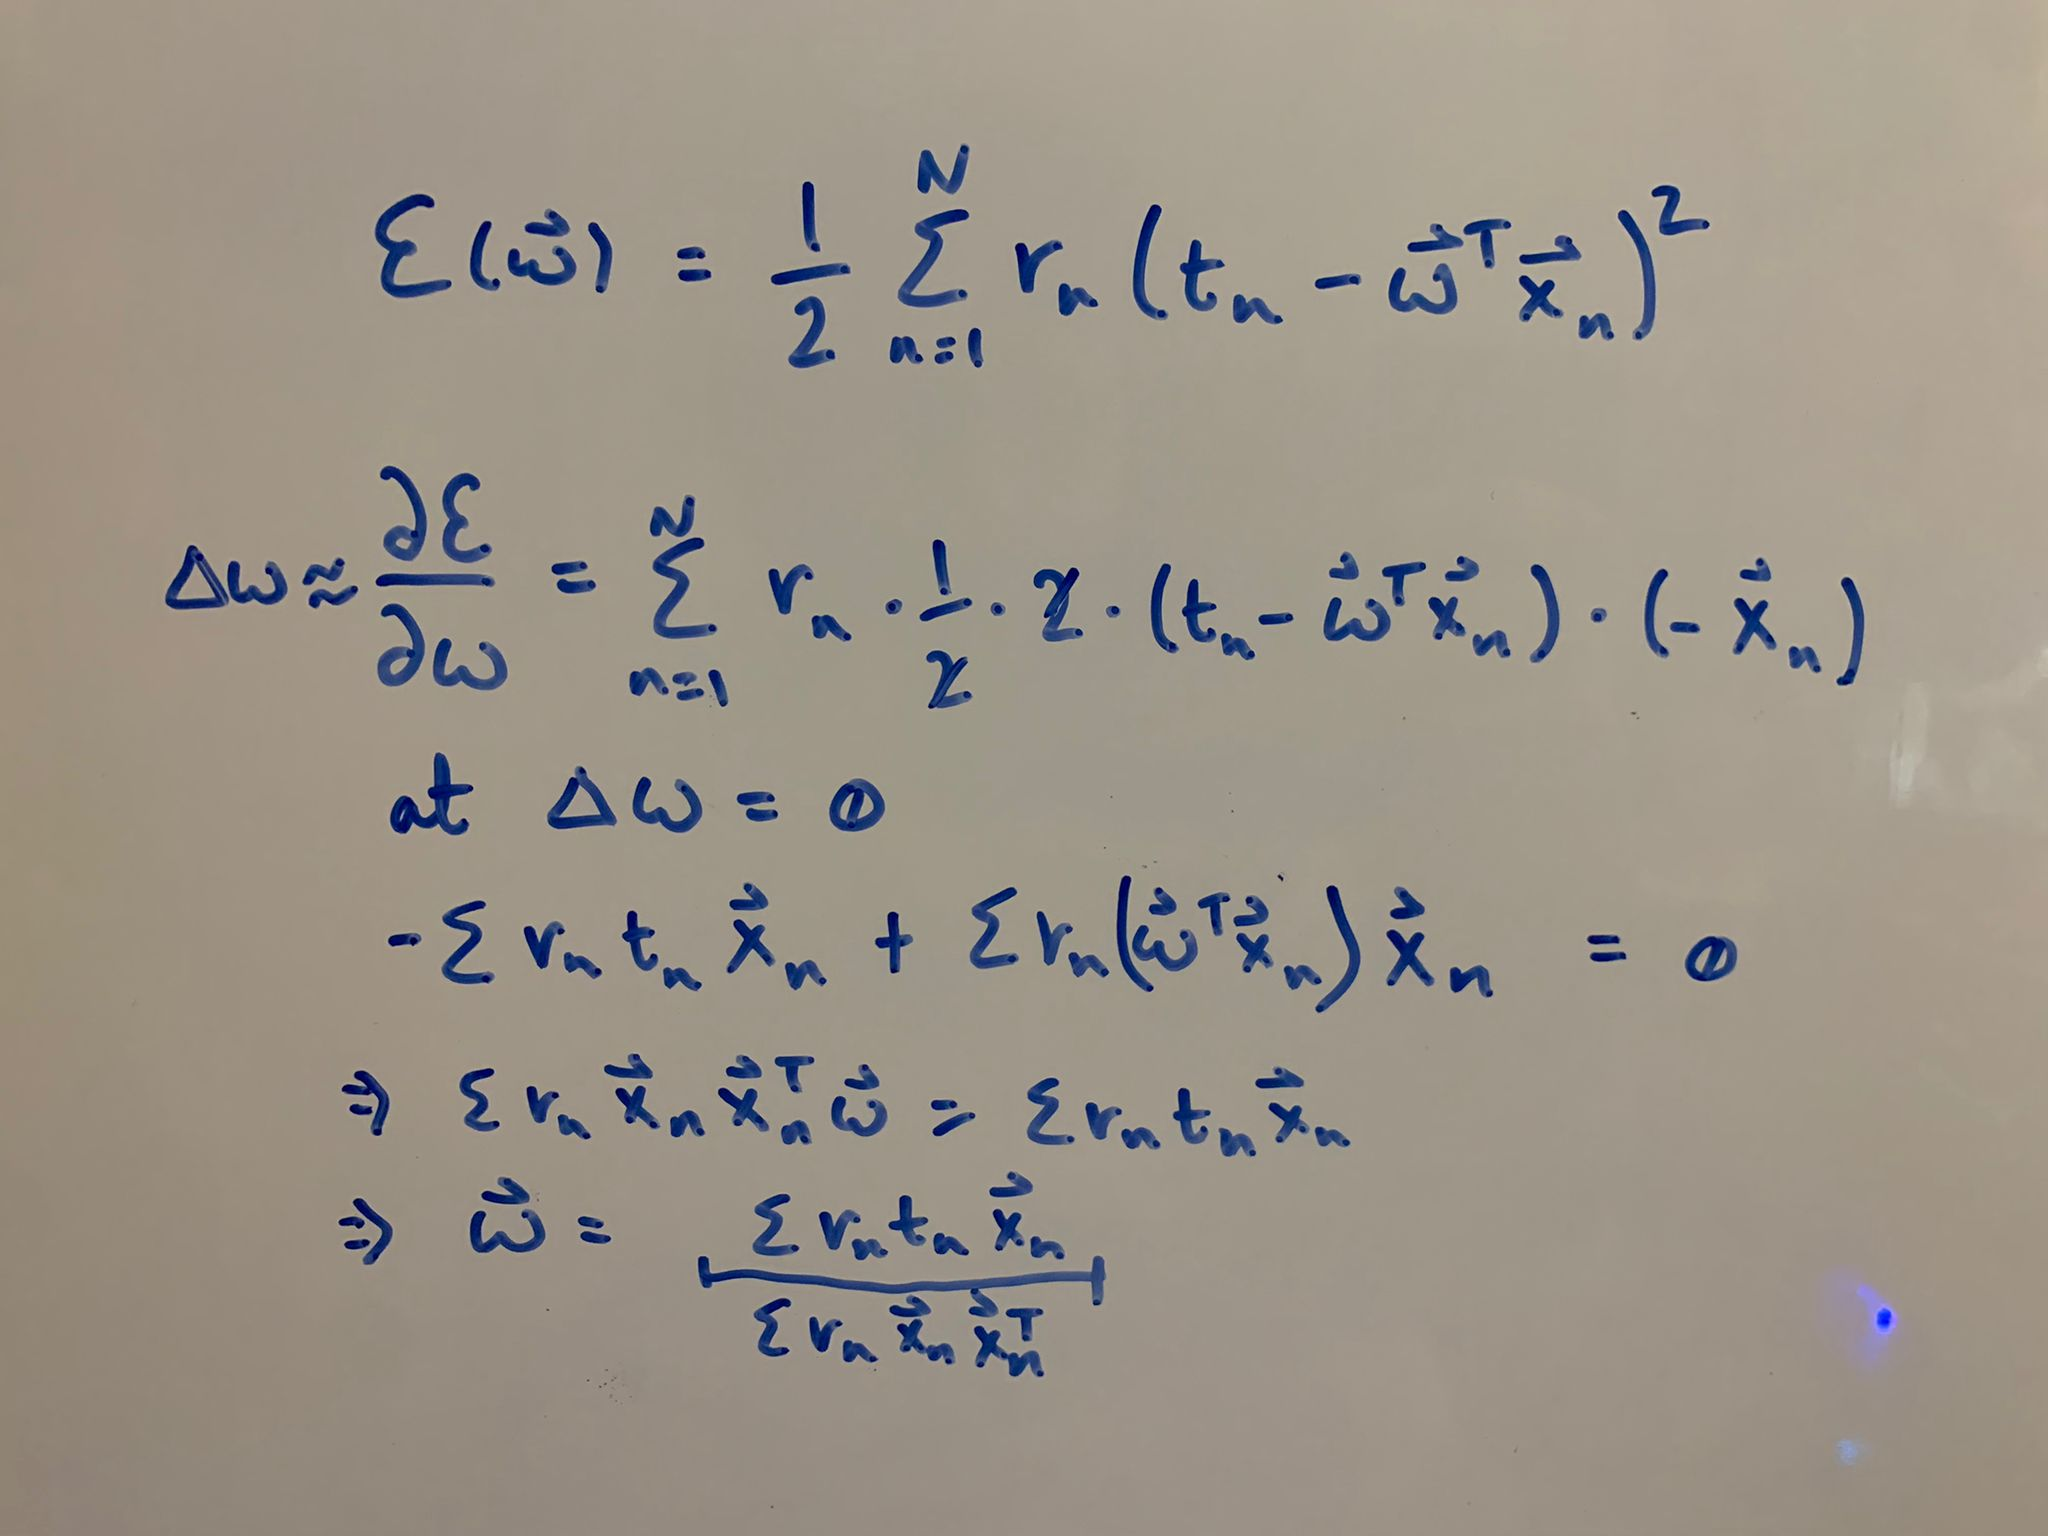

1-b. Implement a function called, `my_error(data,r_n)`, that estimates the error using the error function, $E_D(\vec{w})$, from 1-a. The task to implement a function to estimates the optimized $vec{w}$ and demonstrates the behavior of error at different weighting factor, $r_n$, values. The function return a list of $\vec{w}$, $r_n$, and error. Do not use any other modules except `numpy`. [10 pts]

In [24]:
### my_LR starts here
import numpy as np

def my_error(data,r_n):
    
    x = np.matrix(data)
    t = x[:,-1]
    x = x[:,:-1]
    
    #for r in r_n:
        
    w = (x.T*np.dot(r_n)).I*x.T*r_n*t
        
    error = 
    
    return w, error, r_n

1-c. Load the dataset, make a model using Linear Regression from sklearn.linear_model to predict the target `y` from a given dataset `HW2_LR.csv`. Students must do EDA and pre-processing the dataset before training the model. All pre-processing and EDA work must be explained and the weights and mean squared error value must be reported. Treat the whole dataset as a train set. [15 pts]

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import pandas as pd

In [93]:
data = pd.read_csv('./HW2_LR.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       10000 non-null  float64
 1   b       10000 non-null  float64
 2   c       10000 non-null  float64
 3   d       10000 non-null  float64
 4   k       10000 non-null  float64
 5   y       10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB
None 

        a       b        c         d         k             y
0   70.40  611.72  2679.33 -0.116531  0.408765 -9.804385e+05
1  297.79  172.91  8986.70 -0.668901  0.906781  1.343908e+06
2  213.93  423.22  1505.50 -0.573668  0.862750 -6.170783e+05 

                  a             b             c             d             k  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     150.445884     98.084535   5394.432218     -0.779184      0.788158   
std       86.830028    346.622332   2652.750144      0.617875    

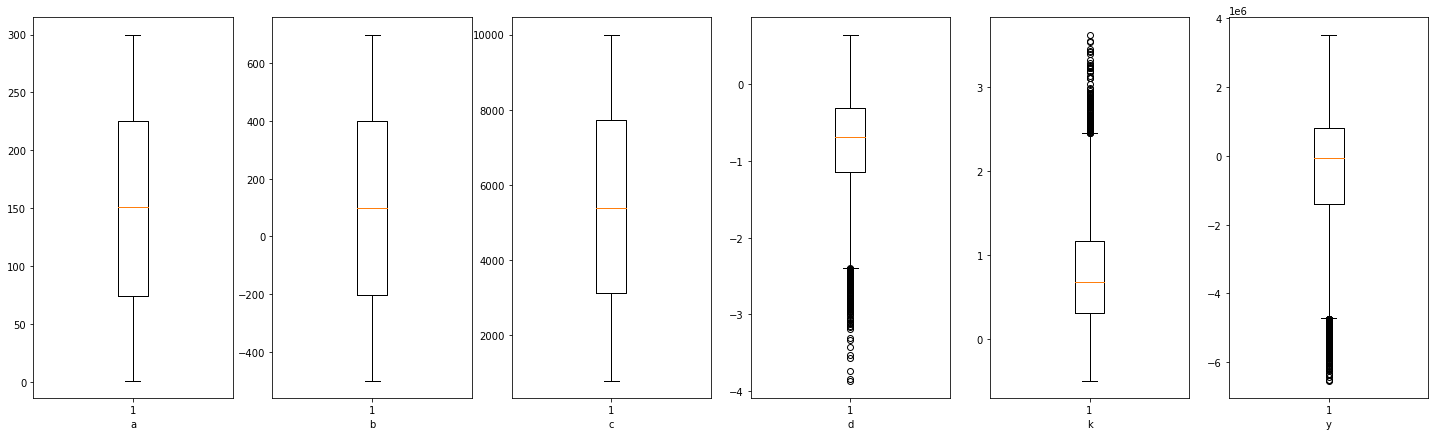

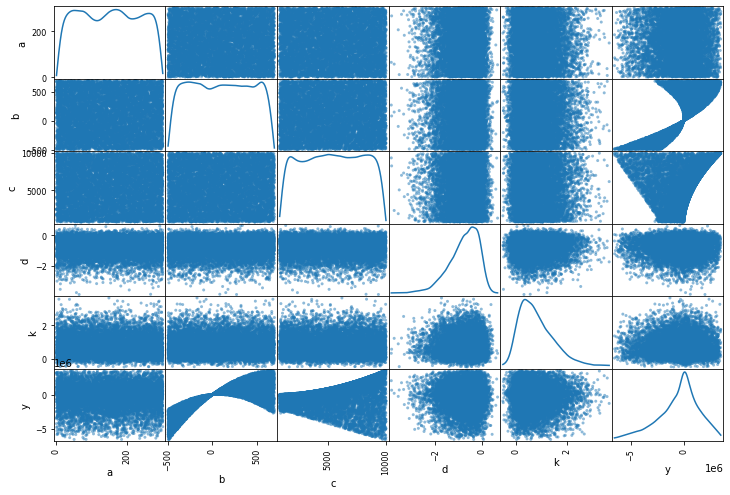

          a         b         c         d         k         y
a  1.000000 -0.000653 -0.006025  0.004453 -0.015583 -0.001269
b -0.000653  1.000000  0.008605  0.000939 -0.010636  0.757798
c -0.006025  0.008605  1.000000 -0.002058 -0.010417  0.143611
d  0.004453  0.000939 -0.002058  1.000000 -0.009728 -0.009892
k -0.015583 -0.010636 -0.010417 -0.009728  1.000000 -0.008144
y -0.001269  0.757798  0.143611 -0.009892 -0.008144  1.000000


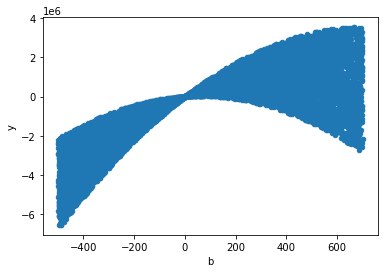

In [165]:
### EDA stars here
print(data.info(),'\n')
print(data.head(3),'\n')
print(data.describe(),'\n')

features = data.columns.tolist()

fig, axs = plt.subplots(1, len(features), figsize = (25,7),facecolor='white')
for i,feat in zip(range(len(features)),features):
    axs[i].boxplot(data[feat].dropna())
    axs[i].set_xlabel(feat)
plt.show()

#data.hist(bins=50, figsize=(20,15))
#plt.show()

pd.plotting.scatter_matrix(data[features], figsize=(12,8), diagonal="kde")
plt.show()

corr = data.corr()
print(corr)

data.plot(kind="scatter", x="b",y="y")
plt.show()

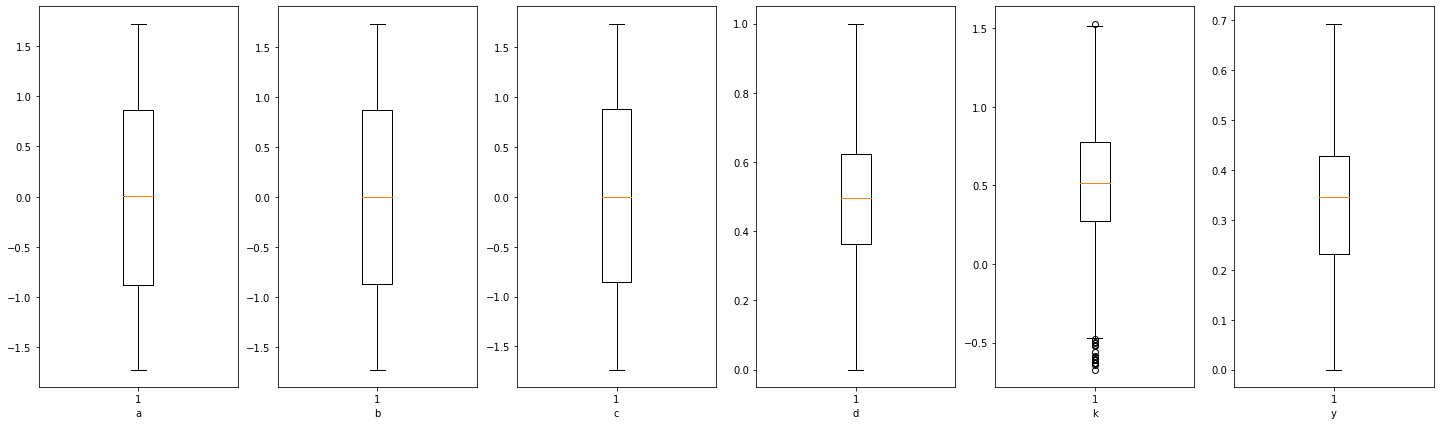

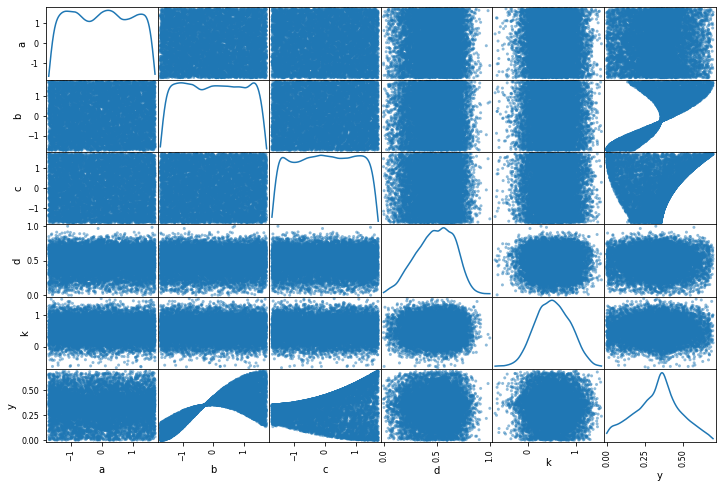

          a         b         c         d         k         y
a  1.000000 -0.000653 -0.006025  0.006158 -0.017387 -0.002304
b -0.000653  1.000000  0.008605 -0.000743 -0.011328  0.759104
c -0.006025  0.008605  1.000000 -0.003658 -0.012006  0.220094
d  0.006158 -0.000743 -0.003658  1.000000 -0.008089 -0.012482
k -0.017387 -0.011328 -0.012006 -0.008089  1.000000 -0.012117
y -0.002304  0.759104  0.220094 -0.012482 -0.012117  1.000000


In [166]:
### Pre-processing starts here
data = pd.read_csv('./HW2_LR.csv')
#data_norm =(data-data.mean())/data.std()

data_norm = data#(data-data.min())/(data.max()-data.min())

#data_norm = data_norm - data_norm.min()

data_norm['a'] =(data['a']-data['a'].mean())/data['a'].std()

data_norm['b'] =(data['b']-data['b'].mean())/data['b'].std()

data_norm['c'] =(data['c']-data['c'].mean())/data['c'].std()

data_norm['k'] = np.log(data['k'] + 1)

data_norm['d'] = np.square((data['d']-data['d'].min())/(data['d'].max()-data['d'].min()))

data_norm['y'] = np.log(1 + np.square((data['y']-data['y'].min())/(data['y'].max()-data['y'].min())))

fig, axs = plt.subplots(1, len(features), figsize = (25,7),facecolor='white')
for i,feat in zip(range(len(features)),features):
    axs[i].boxplot(data_norm[feat].dropna())
    axs[i].set_xlabel(feat)
plt.show()

pd.plotting.scatter_matrix(data_norm[features], figsize=(12,8), diagonal="kde")
plt.show()

corr = data_norm.corr()
print(corr)

In [162]:
### Linear Regression Modeling starts here
LR = LinearRegression()
LR.fit(data_norm[features[:-1]], data_norm[features[-1]])
print(LR.score(data_norm[features[:-1]], data_norm[features[-1]]))
print(LR.coef_,LR.intercept_)
print(LR.predict(data_norm[features[:-1]])[:5], data_norm[features[-1]][:5])

0.6219765591653162
[-7.07906019e-05  1.13286366e-01  3.19434769e-02 -9.61055828e-03
 -4.63461507e-04] 0.33658634784231717
[0.46504125 0.39906097 0.39057132 0.44870025 0.21506151] 0    0.266054
1    0.478377
2    0.297144
3    0.549167
4    0.283856
Name: y, dtype: float64


In [164]:
### Linear Regression Modeling starts here
LR = LinearRegression()
LR.fit(data_norm[features[1:3]], data_norm[features[-1]])
print(LR.score(data_norm[features[1:3]], data_norm[features[-1]]))
print(LR.coef_,LR.intercept_)
print(LR.predict(data_norm[features[1:3]])[:5], data_norm[features[-1]][:5])

0.6218511536260476
[0.1132894 0.0319519] 0.33167325760839206
[0.46684599 0.3993973  0.39109843 0.45049215 0.21641686] 0    0.266054
1    0.478377
2    0.297144
3    0.549167
4    0.283856
Name: y, dtype: float64


In [161]:
data = pd.read_csv('./HW2_LR.csv')
LR = LinearRegression()
LR.fit(data[features[:-1]], data[features[-1]])
print(LR.score(data[features[:-1]], data[features[-1]]))
print(LR.coef_,LR.intercept_)
print(LR.predict(data[features[:-1]])[:5], data[features[-1]][:5])

0.593160724732229
[ 2.46220003e+00  4.02301624e+03  9.52434530e+01 -3.07503640e+04
  3.61949003e+03] -1307239.9769464345
[ 1414144.37774173   268888.36391255   560059.92523787   915108.40870416
 -1697535.10717956] 0   -9.804385e+05
1    1.343908e+06
2   -6.170783e+05
3    2.070210e+06
4   -7.709453e+05
Name: y, dtype: float64


1-d. Use the function `my_error()` from 1-b to estimate $\vec{w}$ and make a visualization to show the behavior of error in terms of $r_n$. Add a point to indicate the final training model error obtained from 1-c. [5 pts]

In [ ]:
### Visualization starts from here. 

### Problem 2 - Linear Classification 1 [65 pts]

In this assignment, you are going to implement three classifiers - **LDA, Perceptron, and Logistic Regression** - to predict the risk of heart attack using the provided dataset, `heart.csv`. 

Here are data attributes:
- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- output : 0= less chance of heart attack 1= more chance of heart attack

2-a. Implement `my_LDA` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [ ]:
from sklearn.metrics import accuracy_score

In [211]:
### my_LDA starts here

class my_LDA():
    
    def __init__(self, x, y):
        
        self.mu = np.mean(x, axis = 0) #assuming x is of shape [N, num_features], mu [1, num_features]
        
        self.classes = np.unique(y)
        
        self.num_class = len(self.classes)
        
        self.Sw = np.zeros((x.shape[1],x.shape[1])) # Sw = Sc1 + Sc2 + .... => Scn = sum_x_in_cn(dot(x-mu1),(x-mu))
        
        self.Sb = np.zeros(Sw.shape)
        
        self.w = None
        
    def fit(self, x, y):
        
        for cls in classes:
            
            cls_idx = cls == y
            
            cls_x = x[cls_idx]
            
            cls_mu = np.mean(cls_X, axis = 0)
            
            self.Sw += np.dot((cls_x - cls_mu).T,(cls_x - cls_mu)) #(num_features,num_features)
        
            self.Sb += len(cls_x) * np.dot(np.expand_dims((cls_mu - self.mu),0),np.expand_dims((cls_mu - self.mu),1))
            
        e_val, e_vect = np.linalg.eig(np.dot(np.linalg.inv(self.Sw),self.Sb))
        
        e_vect = e_vect[np.argsort(e_val)[::-1],:]
        
        self.w = e_vect[:,:self.num_class-1]
        
    def score(self, x, y):
        
        yp = np.dot(x, self.w)
        
        return accuracy_score(y, yp)
        

2-b. Implement `my_Perceptron` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [212]:
### my_Perceptron starts here
from tqdm import trange

class my_Perceptron():
    
    def __init__(self, x):
        
        self.w = np.random.rand(x.shape[1],1)
        
        self.w_grad = np.zeros(self.w.shape)
        
        self.b = np.zeros((1,1))
        
        self.b_grad = np.zeros(self.b.shape)
        
        self.loss = []
        
    def sigmoid(x):
        
        return np.where(x >= 0, 1/(1 + np.exp(-x)), np.exp(x)/(1 + np.exp(x)))
    
    def MSE_loss(y, yp):
        
        return (1/(2 * len(y))) * np.sum(np.square(yp - y))
    
    def forward(self, x):
        
        return np.dot(x, self.w) + self.b
    
    def backward(x, y, yp):
        
        self.w_grad = (1/len(y)) * np.dot(x.T, (yp - y) * (yp * (1 - yp)))
        
        self.b_grad = np.mean((yp - y) * (yp * (1 - yp)))
        
    def step(x, y, yp, lr):
        
        backward(x, y, yp)
        
        self.w += lr * self.w_grad
        
        self.b += lr * self.b_grad
        
    def fit(self, x, y, lr = 0.01, eps = 20):
        
        for _ in trange(eps, desc ='Epochs'):
            
            yp = forward(x)
            
            self.loss.append(MSE_loss(y, yp))
            
            step(x, y, yp, lr)
            
        yp = forward(x)
            
        self.loss.append(MSE_loss(y, yp))
        
        return self.loss
        
    def score(self, x, y, theta = 0.5):
        
        yp = [1 if yt > theta else 0 for yt in forward(x)]
        
        return accuracy_score(y, yp)

2-c. Implement `my_LogisticRegression` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [213]:
### my_LogisticRegression starts here
from tqdm import trange

class my_LogisticRegression():
    
    def __init__(self, x):
        
        self.w = np.random.rand(x.shape[1],1)
        
        self.w_grad = np.zeros(self.w.shape)
        
        self.loss = []
        
    def sigmoid(x):
        
        return np.where(x >= 0, 1/(1 + np.exp(-x)), np.exp(x)/(1 + np.exp(x)))
    
    def Log_loss(y, yp):
        
        return np.sum(y * np.log(yp) + (1 - y) * np.log(1 - yp))
    
    def forward(self, x):
        
        return np.dot(x, self.w)
    
    def backward(x, y, yp):
        
        self.w_grad = np.dot(x.T, (y - yp))
        
    def step(x, y, yp, lr):
        
        backward(x, y, yp)
        
        self.w += lr * self.w_grad
        
    def fit(self, x, y, lr = 0.01, eps = 20):
        
        for _ in trange(eps, desc ='Epochs'):
            
            yp = forward(x)
            
            self.loss.append(Log_loss(y, yp))
            
            step(x, y, yp, lr)
            
        yp = forward(x)
            
        self.loss.append(Log_loss(y, yp))
        
        return self.loss
        
    def score(self, x, y, theta = 0.5):
        
        yp = [1 if yt > theta else 0 for yt in forward(x)]
        
        return accuracy_score(y, yp)

2-d. The EDA and pre-processing are not limitted however, you must
1. check if the data is **balanced** or not. 
2. check if features are **skewed** or not.
3. check outliers. 

For any finds from 1 to 3, please handle the data carefully. Exaplin your workflow and perform accordingly. If any interesting facts are learned, please state them. [15 pts]

In [ ]:
### EDA stars here

In [ ]:
### Pre-processing starts here

2-e. Use ML LDA, Perceptron, and LogisticRegression from sklearn to classify the trained data and report the accuracy. [10 pts]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron

In [ ]:
### LDA starts here
clf1= LinearDiscriminantAnalysis()

clf1_accuracy = accuracy_score(y,y_pred)

In [ ]:
### Perceptron starts here
clf2 = Perceptron()

clf2_accuracy = accuracy_score(y,y_pred)

In [ ]:
### Logistic Regression starts here
clf3 = LogisticRegression()

clf3_accuracy = accuracy_score(y,y_pred)

2-f. Use the implemented classifiers from 2-a to 2-c and classify the output. [10 pts] 

In [210]:
clf4= my_LDA(x,y)

clf4_accuracy = accuracy_score(y,y_pred)

NameError: name 'y' is not defined

In [ ]:
clf5= my_Perceptron()

clf5_accuracy = accuracy_score(y,y_pred)

In [ ]:
clf6= my_LogisticRegression()

clf6_accuracy = accuracy_score(y,y_pred)

In [ ]:
result_table = pd.DataFrame({'Model',['clf1','clf2','clf3','clf4','clf5','clf6'],
                             'Accuracy':[clf1_accuracy,clf2_accuracy,clf3_accuracy,
                                        clf4_accuracy,clf5_accuracy,clf6_accuracy]})
result_table